In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")


In [25]:
data = pd.read_csv(r"C:\Users\aethe\Desktop\work\MLOPS\notebook\Data\stud.csv")
data.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [26]:
data.shape

(1000, 8)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [28]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [29]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [30]:
data.drop_duplicates()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [31]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [32]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [33]:
print("Categories in Gender Variable : ", end=" ")
print(data["gender"].unique())

print("race_ethnicity : ", end=" ")
print(data["race_ethnicity"].unique())

print("parental_level_of_education  : ", end=" ")
print(data["parental_level_of_education"].unique())

print("lunch : ", end=" ")
print(data["lunch"].unique())

print("test_preparation_course : ", end=" ")
print(data["lunch"].unique())

print("math_score : ", end=" ")
print(data["math_score"].unique())

print("reading_score : ", end=" ")
print(data["reading_score"].unique())

print("writing_score : ", end=" ")
print(data["writing_score"].unique())

Categories in Gender Variable :  ['female' 'male']
race_ethnicity :  ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education  :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch :  ['standard' 'free/reduced']
test_preparation_course :  ['standard' 'free/reduced']
math_score :  [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
reading_score :  [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  68  45  47  86  34  79  66  67  91 100  76  77  82
  92  93  62  88  50  28  48  46  23  38  94  97  99  31  96  24 

In [34]:
numeric_features = [features for features in data.columns if data[features].dtype != 'O']
categorical_features = [features for features in data.columns if data[features].dtype == 'O']

print("numeric_features : ", numeric_features)
print("categorical_features : ", categorical_features)

numeric_features :  ['math_score', 'reading_score', 'writing_score']
categorical_features :  ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [35]:
data["total_score"] = data["math_score"] + data["reading_score"] + data["writing_score"]

data["average_score"] = data['total_score'] / 3
data.head(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [36]:
# columns_to_drop = ["math_score", "reading_score", "writing_score"]
# data = data.drop(columns=columns_to_drop)
# data.head(5)

In [37]:
columns = ["math_score", "reading_score", "writing_score"]
for col in columns:
    col_val_count = (data[col] == 100).sum()
    print(f"Full score count in colum {col} : {col_val_count}")

Full score count in colum math_score : 7
Full score count in colum reading_score : 17
Full score count in colum writing_score : 14


In [38]:
columns = ["math_score", "reading_score", "writing_score"]
for col in columns:
    col_val_count = (data[col] <= 20).sum()
    print(f"Less than or equal to twenty count in colum {col} : {col_val_count}")

Less than or equal to twenty count in colum math_score : 4
Less than or equal to twenty count in colum reading_score : 1
Less than or equal to twenty count in colum writing_score : 3


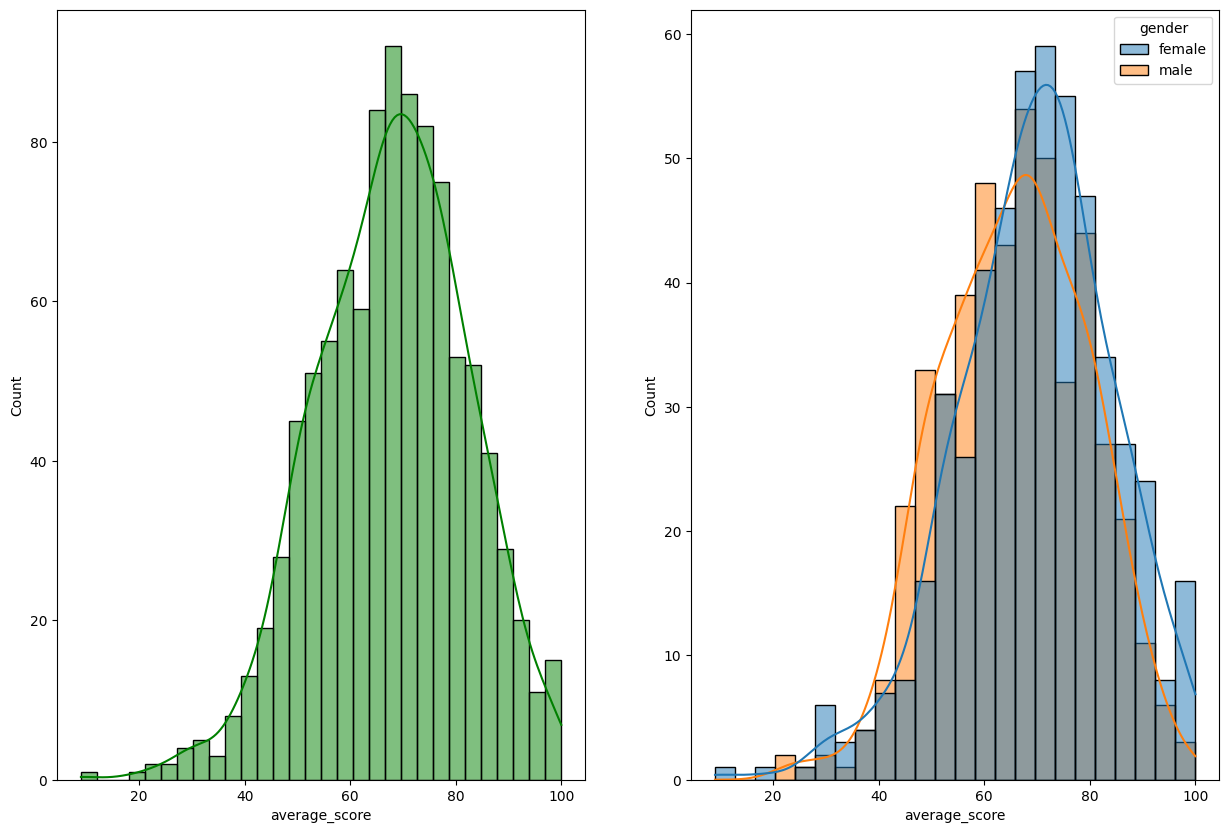

In [39]:
plt.figure(figsize=(15,10))
plt.subplot(121)
sns.histplot(data=data, x="average_score",bins=30, kde=True, color="g")
plt.subplot(122)
sns.histplot(data=data, x="average_score", kde=True, hue="gender")
plt.show()

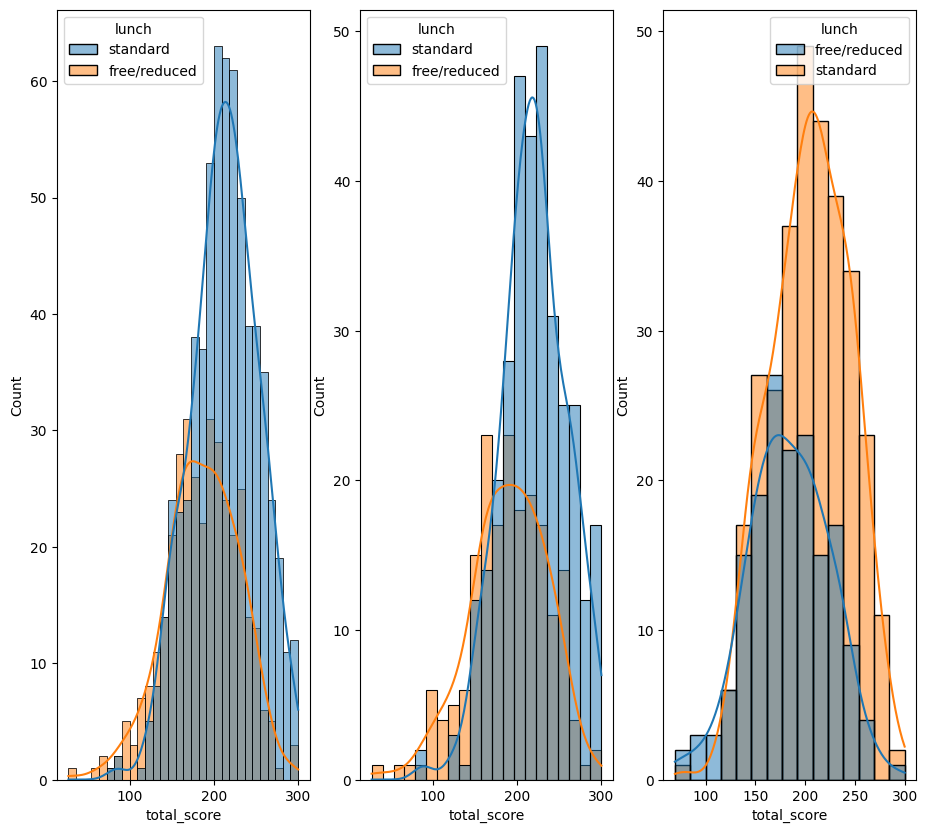

In [40]:
plt.figure(figsize=(15,10))
plt.subplot(141)
sns.histplot(data=data, x="total_score", bins=30, kde=True, color="b", hue="lunch")
plt.subplot(142)
sns.histplot(data=data[data["gender"] == "female"], x="total_score",kde=True,hue="lunch")
plt.subplot(143)
sns.histplot(data=data[data["gender"]=="male"], x="total_score", kde=True, hue="lunch")
plt.show()